# Customer Segmentation Using K-Means Clustering
### Implementasi Latihan  Machine Learning 

Project ini bertujuan melakukan segmentasi pelanggan menggunakan algoritma **K-Means Clustering**.  
Dataset berisi 6 fitur utama perilaku pelanggan:

- Age  
- Income  
- App Time  
- Web Time  
- Purchase Count  
- Spending Score  

Tahapan analisis:
1. Exploratory data analysis  
2. Preprocessing data  
3. Penentuan jumlah cluster optimal  
4. Penerapan K-Means  
5. Visualisasi PCA  
6. Insight bisnis  



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


## 📥 Load Dataset
Dataset yang digunakan merupakan data simulasi pelanggan e-commerce berdasarkan instruksi matakuliah sebagai latihan project

In [2]:
df = pd.read_csv("../dataset/ecommerce_customers.csv")
df.head()


,Age,Income,App Time,Web Time,Purchase Count,Spending Score
0,56,8971,109.33,82.25,29,82
1,46,7625,163.20,69.93,22,86
2,32,4950,17.73,146.80,4,40
3,25,9992,57.76,61.17,20,84
4,38,14323,171.57,94.99,32,77


## 📊 Exploratory Data Analysis
Melihat informasi data & statistik awal.


In [3]:

print(df.info())
print(df.describe())
print(df.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             350 non-null    int64  
 1   Income          350 non-null    int64  
 2   App Time        350 non-null    float64
 3   Web Time        350 non-null    float64
 4   Purchase Count  350 non-null    int64  
 5   Spending Score  350 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 16.5 KB
None
              Age        Income    App Time    Web Time  Purchase Count  \
count  350.000000    350.000000  350.000000  350.000000      350.000000   
mean    39.488571   8606.737143   94.541429   82.996886       19.954286   
std     12.352216   3632.130895   48.799501   45.821039       11.149578   
min     18.000000   2004.000000   10.790000    5.990000        1.000000   
25%     29.000000   5645.000000   51.367500   41.135000       11.000000   
50%     41.000000   8615.50000

## 🧹 Preprocessing Data
Melakukan scaling pada 6 fitur utama agar memiliki skala yang sama.


In [4]:
features = ["Age", "Income", "App Time", "Web Time", "Purchase Count", "Spending Score"]
data = df[features]
data.head()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

print("Data berhasil di-scaling!")

Data berhasil di-scaling!


## 📉 Menentukan Jumlah Cluster Optimal — Elbow Method


Elbow Method
- Mengecek penurunan inertia (WCSS).
- K menunjukkan titik "siku" sebagai kandidat jumlah cluster.

k=2, inertia=1810.643182712074
k=3, inertia=1628.2444419124577
k=4, inertia=1480.0045544124835
k=5, inertia=1349.1032424224213
k=6, inertia=1251.659885445529
k=7, inertia=1216.6328595786144
k=8, inertia=1116.6469817578204
k=9, inertia=1049.0251186437388
k=10, inertia=997.6423580683065


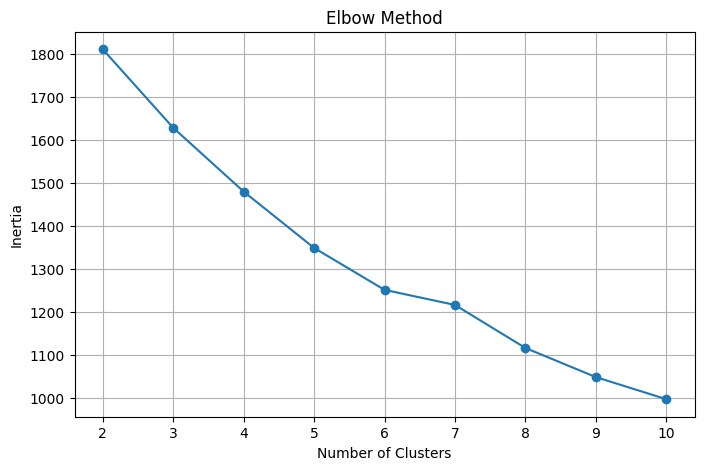

In [5]:
K = range(2, 11)
inertia_values = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia_values.append(kmeans.inertia_)
    print(f"k={k}, inertia={kmeans.inertia_}")

plt.figure(figsize=(8, 5))
plt.plot(list(K), inertia_values, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

## 🧩 Silhouette Score
Mengukur kualitas cluster untuk setiap nilai k.


k=2, Silhouette Score=0.13235072728394662
k=3, Silhouette Score=0.12390435354159779
k=4, Silhouette Score=0.13010919582997799
k=5, Silhouette Score=0.13522980795429373
k=6, Silhouette Score=0.14553685250356413
k=7, Silhouette Score=0.13315039149793234
k=8, Silhouette Score=0.14561893125680792
k=9, Silhouette Score=0.1558397508683933
k=10, Silhouette Score=0.16104043899838633


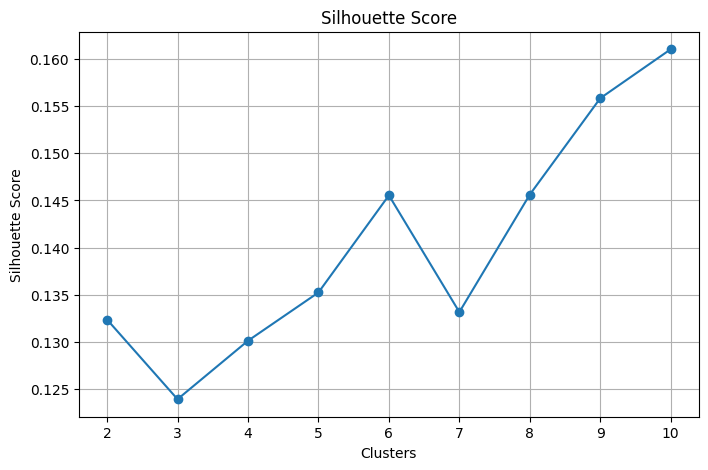

In [6]:
silhouette_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    
    score = silhouette_score(scaled_data, labels)
    silhouette_scores.append(score)
    print(f"k={k}, Silhouette Score={score}")

plt.figure(figsize=(8, 5))
plt.plot(list(K), silhouette_scores, marker='o')
plt.title("Silhouette Score")
plt.xlabel("Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

In [7]:
k_values = list(range(2, 11))  

best_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print("K terbaik:", best_k)


K terbaik: 10


## 🚀 Model Training
Menggunakan jumlah cluster optimal dari hasil analisis (misal k=4).


In [8]:
best_k = 4

# K-Means Training
kmeans = KMeans(n_clusters=best_k, random_state=42)
final_labels = kmeans.fit_predict(scaled_data)

df["Cluster"] = final_labels
df.head()

,Age,Income,App Time,Web Time,Purchase Count,Spending Score,Cluster
0,56,8971,109.33,82.25,29,82,3
1,46,7625,163.20,69.93,22,86,3
2,32,4950,17.73,146.80,4,40,1
3,25,9992,57.76,61.17,20,84,2
4,38,14323,171.57,94.99,32,77,3


Berdasarkan analisis Silhouette Score, nilai k terbaik secara matematis adalah k = 10.
Namun, dalam praktik bisnis, jumlah cluster terlalu banyak dapat menyulitkan interpretasi dan penerapan strategi pemasaran.
Oleh karena itu, project ini menggunakan k = 4 sebagai jumlah cluster final karena memberikan segmentasi yang lebih sederhana, jelas, dan actionable untuk kebutuhan bisnis.

## 🎨 Visualisasi Cluster (PCA 2D)
Mengurangi dimensi data menjadi 2 komponen untuk visualisasi.


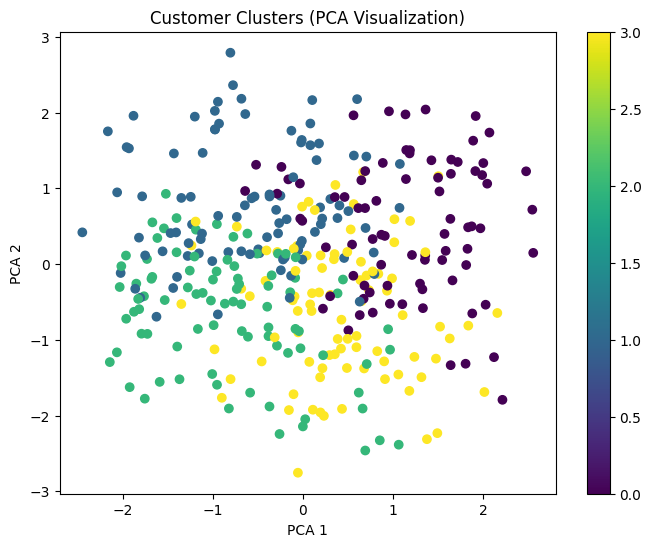

In [9]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

df["PCA1"] = pca_result[:, 0]
df["PCA2"] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
plt.scatter(df["PCA1"], df["PCA2"], c=df["Cluster"], cmap="viridis")
plt.title("Customer Clusters (PCA Visualization)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar()
plt.show()

## 📌 Cluster Profiling
Melihat karakteristik tiap cluster berdasarkan nilai rata-rata fitur.


In [10]:
cluster_profile = df.groupby("Cluster")[features].mean()
cluster_profile


,Age,Income,App Time,Web Time,Purchase Count,Spending Score
Cluster,,,,,,
0,45.462500,8224.112500,145.598750,95.918750,13.175000,37.162500
1,39.138298,9058.585106,55.298723,127.946489,22.223404,49.138298
2,26.390805,9091.586207,81.681724,47.983218,20.183908,50.540230
3,47.292135,7999.483146,102.665281,58.133708,23.426966,73.595506


Insight Bisnis

## 💡 Business Insights
Cluster 0 – Low Spending Browsers
- Spending Score rendah
- Purchase Count rendah
- App Time & Web Time tinggi
➡️ Pelanggan sering melihat produk, tetapi jarang melakukan pembelian.
Strategi: Berikan voucher, promo, dan retargeting ads.

Cluster 1 – Budget Buyers
- Income rendah
- Spending rendah–sedang
- Aktivitas aplikasi stabil
➡️ Pelanggan sensitif harga dan cenderung memilih produk murah.
Strategi: Flash sale, bundle hemat, notifikasi diskon.

Cluster 2 – High Spenders
- Spending Score tertinggi
- Purchase Count tinggi
- Income cukup tinggi
➡️ Kelompok pelanggan bernilai tinggi dan sangat loyal.
Strategi: Loyalty program, cashback eksklusif, rekomendasi produk premium.

Cluster 3 – Premium Efficient Users
- Income tinggi
- Web Time rendah (belanja cepat)
- Spending sedang–tinggi
➡️ Pelanggan efisien yang langsung checkout tanpa banyak browsing.
Strategi: Optimalkan UI cepat, tampilkan produk premium, rekomendasi personal.

## 📘 Kesimpulan
Algoritma K-Means berhasil mengelompokkan pelanggan menjadi beberapa segmen yang dapat digunakan untuk:

✔ Menentukan strategi pemasaran yang lebih tepat sasaran
✔ Personalisasi penawaran berdasarkan perilaku pelanggan
✔ Mengidentifikasi pelanggan bernilai tinggi
✔ Meningkatkan rekomendasi produk dan efektivitas promosi